In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2

In [2]:
classes = os.listdir('../data/train')

In [3]:
 def scaler(image, height, width):
    hscaler = height/image.shape[0]
    wscaler = width/image.shape[1]
    scaler = np.zeros(2)
    if hscaler > wscaler:
        image = cv2.resize(image,dsize=(0,0),fx=wscaler,fy=wscaler,interpolation=cv2.INTER_CUBIC)
        pad = height - image.shape[0]
        top = int(np.floor(pad * 0.5))
        bottom = int(pad-top)
        image = np.pad(image, ((top,bottom),(0,0),(0,0)), 'constant', constant_values=(0,0))
        scaler[1] = wscaler 

    elif hscaler < wscaler:
        image = cv2.resize(image,dsize=(0,0),fx=hscaler,fy=hscaler,interpolation=cv2.INTER_CUBIC)
        pad = width - image.shape[1]
        left = int(np.floor(pad * 0.5))
        right = int(pad-left)
        image = np.pad(image, ((0,0),(left,right),(0,0)), 'constant', constant_values=(0,0))
        scaler[0] = hscaler
    else:
        #Perfect fit no padding needed
        image = cv2.resize(image,dsize=(0,0),fx=wscaler,fy=hscaler,interpolation=cv2.INTER_CUBIC)
        scaler[0] = hscaler
        
    return image
classes

['Oat', 'Broken', 'Wheat', 'Barley', 'Rye']

In [33]:

path =  '/zhome/27/c/138037/share/data/train/'
category = ['Barley', 'Broken', 'Oat', 'Rye', 'Wheat']
file_paths = next(os.walk(path  + category[1]))[2]
img1 = np.load(os.path.join(path + category[1] + '/' + file_paths[13]))[:,:,[4,2,1]]
img2 = np.load(os.path.join(path + category[1] + '/' + file_paths[400]))[:,:,[4,2,1]]
img3 = np.load(os.path.join(path + category[1] + '/' + file_paths[700]))[:,:,[4,2,1]]
img4 = np.load(os.path.join(path + category[1] + '/' + file_paths[710]))[:,:,[4,2,1]]
img5 = np.load(os.path.join(path + category[1] + '/' + file_paths[342]))[:,:,[4,2,1]]

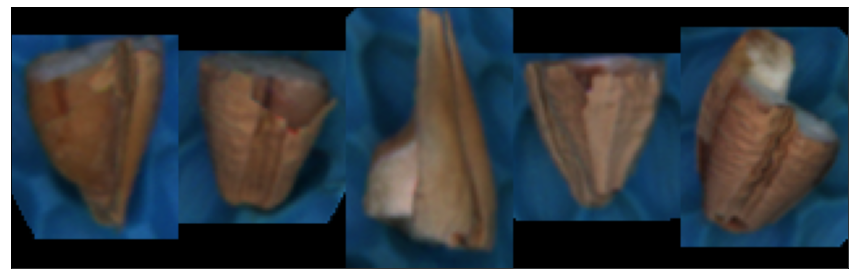

<Figure size 432x288 with 0 Axes>

In [35]:
height, width = 100,64


fig = plt.figure(figsize=(15,5))

cax = plt.imshow(np.hstack(([scaler(img[5:], height, width) for img in [img1,img2,img3,img4,img5]])))
plt.xticks([])
plt.yticks([])
plt.show()

plt.savefig('../img/five-broken.png')



In [206]:
os.getcwd()

'/zhome/27/c/138037/share/src'

In [10]:
temp_im0 = np.load('../data/'+all_file_names[1][99]) # Oat
temp_im1 = np.load('../data/'+all_file_names[1][199]) # Broken
temp_im2 = np.load('../data/'+all_file_names[1][299]) # Wheat
temp_im3 = np.load('../data/'+all_file_names[1][399]) # Barley
temp_im4 = np.load('../data/'+all_file_names[1][899]) # Rye

# temp_im[temp_im[:,:,-1] == 0] = 0

fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots( 1,5, sharey=True, figsize = (15, 15))
ax1.imshow(temp_im0[:,:,[4,2,1]])
ax2.imshow(temp_im1[:,:,[4,2,1]])
ax3.imshow(temp_im2[:,:,[4,2,1]])
ax4.imshow(temp_im3[:,:,[4,2,1]])
ax5.imshow(temp_im4[:,:,[4,2,1]])
#fig.savefig("../img/five-broken")
fig.show()

IndexError: list index out of range

In [39]:
x_size = np.load("x_size.npy")
y_size = np.load("y_size.npy")

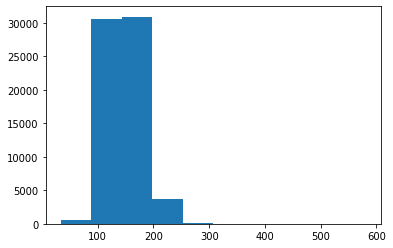

In [40]:
plt.hist(x_size)
plt.show()

In [42]:
y_size[y_size>99]

array([133, 105, 103, 102, 103, 106, 119, 100, 100, 100, 105, 100, 101,
       109])

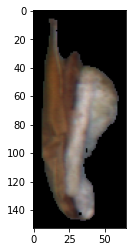

In [44]:
temp_im = np.load('../data/'+all_file_names[1][4])
temp_im[temp_im[:,:,-1] == 0] = 0
plt.imshow(temp_im[:,:,[4,2,1]])
plt.show()

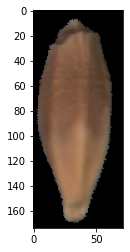

In [45]:
temp_im = np.load('../data/'+all_file_names[0][20])
temp_im[temp_im[:,:,-1] == 0] = 0
plt.imshow(temp_im[:,:,[4,2,1]])
plt.show()

In [47]:
print(np.quantile(x_size,0.999))
print(np.quantile(y_size,0.999))

297.00100000000384
89.0


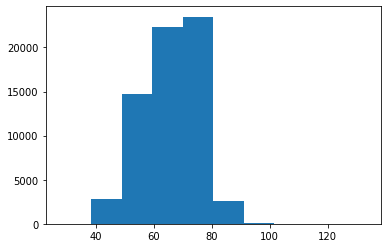

In [48]:
plt.hist(y_size)
plt.show()

In [49]:
# max_height = 0
# max_width = 0
# for i in range(len(all_file_names)):
#     for j in range(len(all_file_names[i])):
#         temp = np.load('../data/'+all_file_names[i][j])
#         if temp.shape[0] > max_height:
#             max_height = temp.shape[0]
#             height_im = (i,j)
#         if temp.shape[1] > max_width:
#             max_width = temp.shape[1]
#             width_im = (i,j)

# print("maximum height is: {height}\n maximum width is: {width}".format(height=max_height,width=max_width))
# print("Image with maximum height is: {height}\n Image with maximum width is: {width}".format(height=height_im,width=width_im))

maximum height is: 580

maximum width is: 133

Image with maximum height is: (0, 13311)

Image with maximum width is: (0, 2699)

In [20]:
barley_hist = np.load("barley_hist.npy")
oat_hist = np.load("oat_hist.npy")
broken_hist = np.load("broken_hist.npy")
wheat_hist = np.load("wheat_hist.npy")
rye_hist = np.load("rye_hist.npy")

In [21]:
all_bar = np.zeros(255)
for i in range(barley_hist.shape[1]):
    all_bar = all_bar + barley_hist[:,i]
    
all_oat = np.zeros(255)
for i in range(oat_hist.shape[1]):
    all_oat = all_oat + oat_hist[:,i]
    
all_bro = np.zeros(255)
for i in range(broken_hist.shape[1]):
    all_bro = all_bro + broken_hist[:,i]
    
all_whe = np.zeros(255)
for i in range(wheat_hist.shape[1]):
    all_whe = all_whe + wheat_hist[:,i]
    
all_rye = np.zeros(255)
for i in range(rye_hist.shape[1]):
    all_rye = all_rye + rye_hist[:,i]

In [22]:
#Norming
#for i in range(255):
#    int_min = np.min([all_bar[i], all_bro[i], all_oat[i], all_bro[i], all_whe[i], all_rye[i]])
#    int_max = np.max([all_bar[i], all_bro[i], all_oat[i], all_bro[i], all_whe[i], all_rye[i]])
#    [(array - int_min) / (int_max - int_min) for array in [all_bar[i], all_oat[i], all_bro[i], all_whe[i], all_rye[i]]]
bins = 5   
all_bar = all_bar[:-5].reshape(-1, bins).mean(axis=1)
all_bro = all_bro[:-5].reshape(-1, bins).mean(axis=1)
all_oat = all_oat[:-5].reshape(-1, bins).mean(axis=1)
all_whe = all_whe[:-5].reshape(-1, bins).mean(axis=1)
all_rye = all_rye[:-5].reshape(-1, bins).mean(axis=1)


AttributeError: 'numpy.ndarray' object has no attribute 'bar'

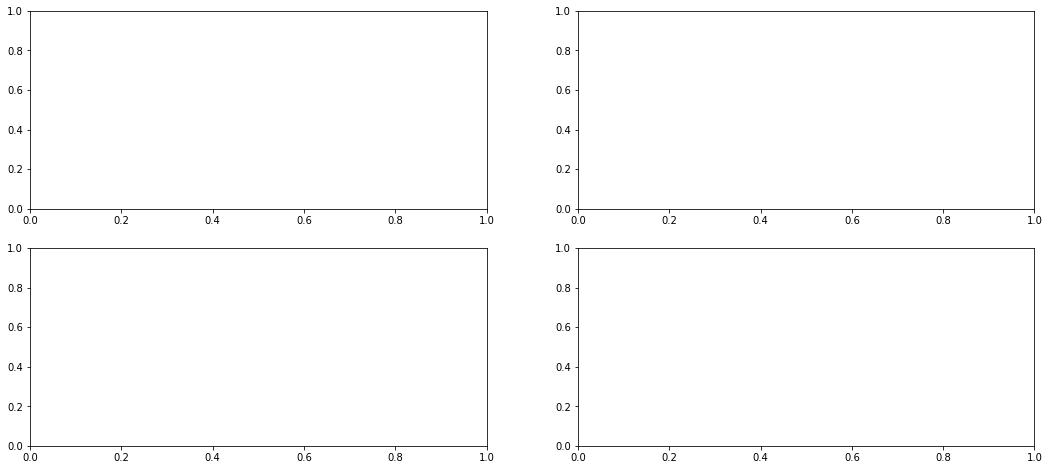

In [23]:
bins = 5
alpha = 0.9
width = 0.5
linewidth = 0.5
edgecolor = 'k'
color='w'

fig,axes = plt.subplots(2,2, figsize=(18,8))
axes[0].bar(np.arange(0,bins*10),all_oat / np.linalg.norm(all_oat), align='edge', linewidth=-linewidth, width=width, color='r', edgecolor=edgecolor, alpha=0.4)
axes[1].bar(np.arange(0,bins*10),all_rye / np.linalg.norm(all_rye), align='edge', linewidth=linewidth, width=width, color='g', edgecolor=edgecolor, alpha=0.4)
axes[2].bar(np.arange(0,bins*10),all_bar / np.linalg.norm(all_bar), linewidth=linewidth, width=width, color='b', edgecolor=edgecolor, alpha=0.4)
axes[3].bar(np.arange(0,bins*10),all_bro / np.linalg.norm(all_bro), align='edge', linewidth=1, width=width, color=color, edgecolor='xkcd:purple', alpha=alpha)


#axes.bar(np.arange(0,bins*10),all_whe / np.linalg.norm(all_whe), align='edge', linewidth=1, width=width,color=color, edgecolor='xkcd:green', alpha=0.5)

#fig.savefig("Intensity_distribution")
fig.show()

In [208]:
fig, axes = plt.subplots((2,2), figsize=(15,5))
plt.add_subplot()

TypeError: 'tuple' object cannot be interpreted as an integer

<Figure size 1080x360 with 0 Axes>